In [1]:
import theano
import theano.tensor as tt
import pymc3 as pm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['retina']
plt.rc('font', size=12)
plt.style.use('seaborn-darkgrid')

In [3]:
# 1. load the stock returns data.
series = pd.read_csv('D:/Pymc_All/Introduction_to_PyMC3-master/Introduction_to_PyMC3-master/Example1/stock_returns.csv')
returns = series.values[:1000]

In [4]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       19998 non-null  float64
dtypes: float64(1)
memory usage: 156.4 KB


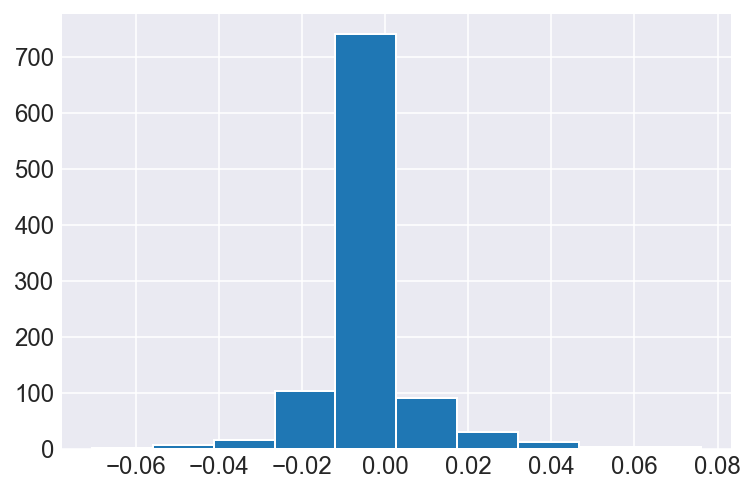

In [5]:
plt.hist(returns, ec='white');

In [6]:
# 2. first, let's see if it makes sense to fit a Gaussian distribution to this.
with pm.Model() as model1:
    stdev = pm.HalfNormal('stdev', sd=.1)
    mu = pm.Normal('mu', mu=0.0, sd=1.)

    pm.Normal('returns', mu=mu, sd=stdev, observed=returns)

In [7]:
with model1:
    trace = pm.sample(500, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [mu, stdev]


Sampling 3 chains for 1_000 tune and 500 draw iterations (3_000 + 1_500 draws total) took 15 seconds.


In [9]:
pm.sampling.sample(trace, samples=500, model=model1)
# preds = pm.sample_ppc(trace, samples=500, model=model1)
y = np.reshape(np.mean(preds['returns'], axis=0), [-1])

TypeError: '<' not supported between instances of 'MultiTrace' and 'int'

#### 랜덤하게, 숫자뽑을때 분포를 이용하기

In [ ]:
np.random.seed(0)

ndims = 5
ndata = 100
X = np.random.randn(ndata, ndims)
w_ = np.random.randn(ndims)  # hidden
noise_ = 0.1 * np.random.randn(ndata)  # hidden

y_obs = X.dot(w_) + noise_

In [ ]:
print(X.shape,w_.shape)

In [ ]:
(X.dot(w_)).shape

In [ ]:
rslt = X.dot(w_)
rslt[0:10]

## pymc3 basic youtube로 따라하기

## Reference  
- The Math Student Youtube (https://www.youtube.com/watch?v=Bv92hl-z4yM)
- The Math Student Collab (https://colab.research.google.com/drive/1pM8DqiMO1QjvZ0Y_LzJbJ_jIryeU5O7o#scrollTo=-jXDlGEArVYj)  
- Youtube lecture (https://www.youtube.com/watch?v=M-kBB2I4QlE&t=3s)

In [ ]:
# import numpy as np
import matplotlib.pyplot as plt
# import pymc3 as pm

from matplotlib import animation, rc
%matplotlib inline

In [ ]:
np.std(μ)

In [ ]:
σ_μ = 20
μ = σ_μ * np.random.randn(2000) # prior distribution
plt.hist(μ, 50)
plt.title('Prior distribution')
plt.show()

표준편차 20 짜리 정규분포에 대한 히스토그램

In [ ]:
sum_x = 0
N = 0
data = []

y = 4 + np.random.randn(100,1) #observations

y : mean = 4, shape is 100 by 1

In [ ]:
print(y.shape)
print(np.mean(y))

In [ ]:
σ_μ

In [ ]:
for i in range(100):
    sample = y[i]
    sum_x += sample ## sample의 누적값
    N += 1
    posterior_mean = sum_x/(N+1/σ_μ**2)
    posterior_var = 1/(N+1/σ_μ**2)
    posterior_samples = posterior_mean + np.sqrt(posterior_var) * np.random.randn(2000)
    data.append(posterior_samples)

## pymc vs pymc3
사실정확히는 나도 잘 모르겠다. 일단 구현이 잘 안되어서 Collab 으로 하는게 제일 나은것 같다